In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')

### Comparing training and test scores and what they mean
    Tr = Te (low) -- underfit
    Tr = Te (high) -- good fit
    Tr > Te -- overfit
    Tr < Te -- outliers

I will be fitting the data to several regression model types and in testing I will choose the best fit model.

### Regression models used:

-  Muliple Linear Regression
-  Polynomial Regression
-  Ridge Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [ ]:
Hotels = pd.read_csv('reg22.csv')


In [ ]:
Hotels.rename({'Size': 'Size_m2'}, axis=1, inplace=True) 
Hotels.head() # important price transformed to >> Log_price 

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30


# Preprocessing

apply transformations to linearize and standerdize clean data:


1. Normalization And Standardization
2. Feature Scaling 
3. Guassian Transformations




In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
#sns.pairplot(Hotels)


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
Hotels.columns

Index(['hotel_name', 'location', 'price', 'room_type', 'beds', 'rating',
       'rating_title', 'number_of_ratings', 'per_night',
       'Log_number_of_ratings', 'Log_price', 'Size_m2'],
      dtype='object')

###transforming discrete independent variable 'beds':

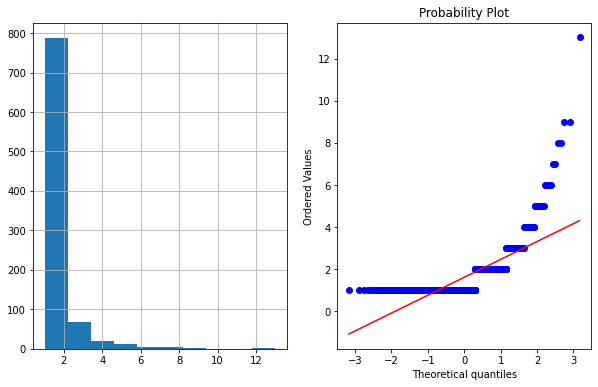

In [ ]:
plot_data(Hotels, 'beds')

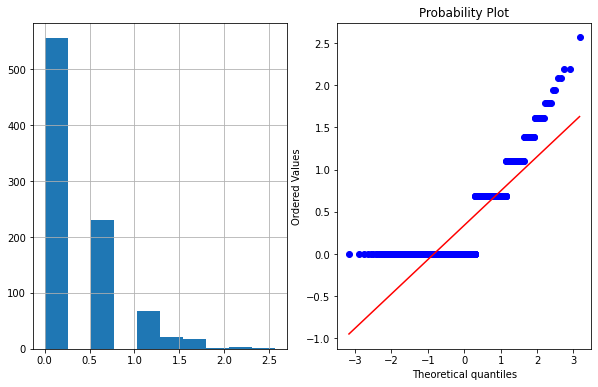

In [ ]:
Hotels['beds_log'] = np.log(Hotels.beds)
plot_data(Hotels, 'beds_log')

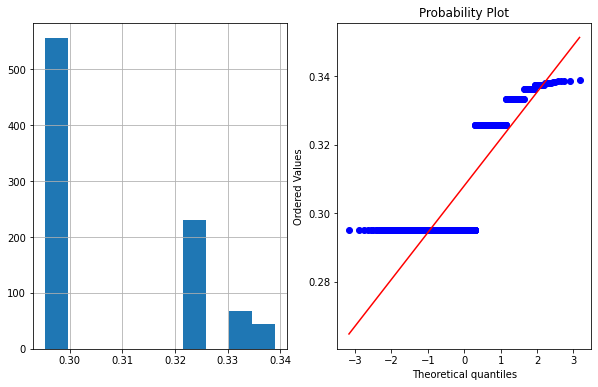

In [ ]:
Hotels['beds_Boxcox'],parameters=stat.boxcox(Hotels['beds']+1)
plot_data(Hotels,'beds_Boxcox')

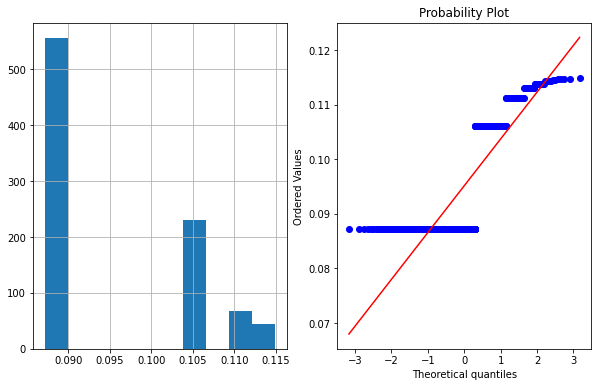

In [ ]:
Hotels['beds_boxcox^2'] = np.power(Hotels.beds_Boxcox,2)
plot_data(Hotels, 'beds_boxcox^2')

###transforming continuos independent variables 'rating' and 'number of ratings':

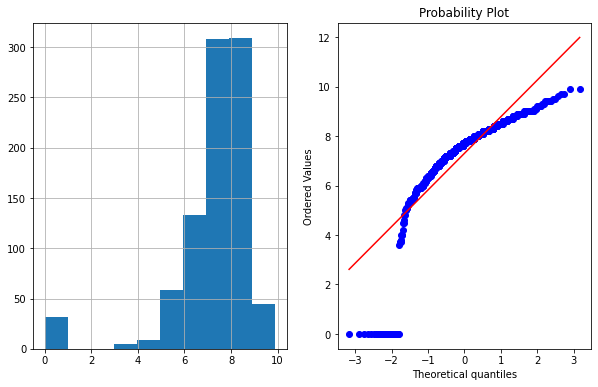

In [ ]:
plot_data(Hotels, 'rating')

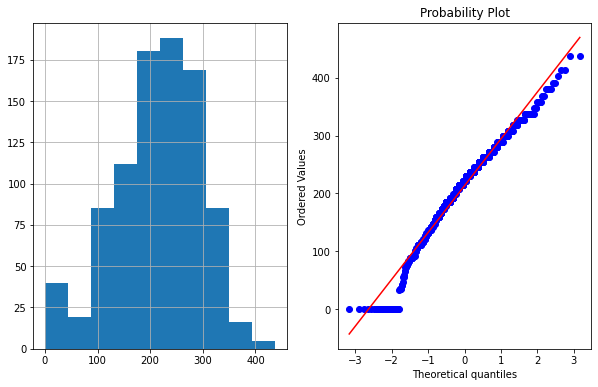

In [ ]:
Hotels['rating_Boxcox'],parameters=stat.boxcox(Hotels['rating']+1)
plot_data(Hotels,'rating_Boxcox')

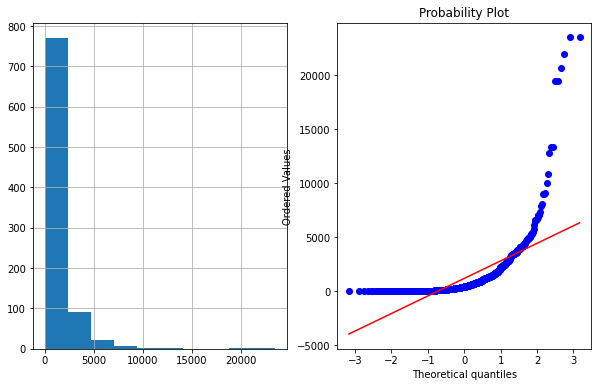

In [ ]:
plot_data(Hotels, 'number_of_ratings')

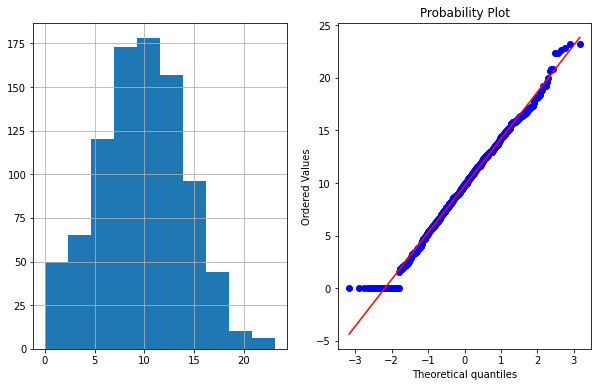

In [ ]:
Hotels['number_of_ratings_Boxcox'],parameters=stat.boxcox(Hotels['number_of_ratings']+1)
plot_data(Hotels,'number_of_ratings_Boxcox')

### Transforming dependent variable size:

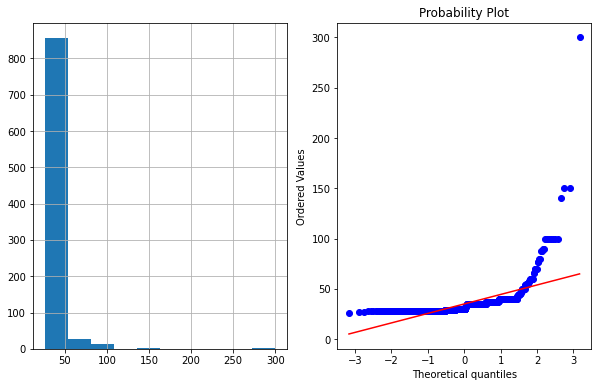

In [ ]:
plot_data(Hotels, 'Size_m2')

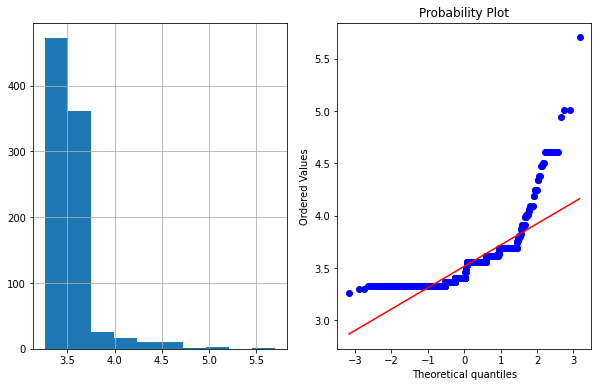

In [ ]:
Hotels['Size_m2_log'] = np.log(Hotels['Size_m2'])
plot_data(Hotels,'Size_m2_log')

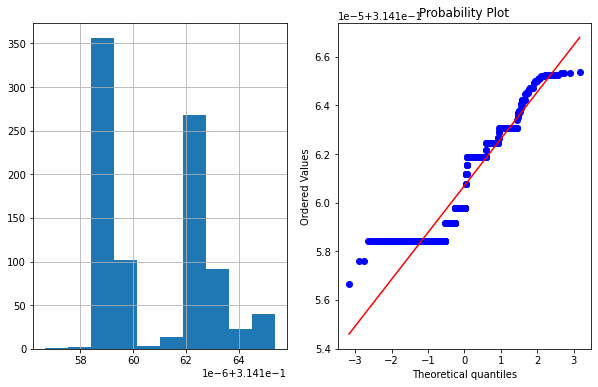

In [ ]:
Hotels['Size_m2_Boxcox'],parameters=stat.boxcox(Hotels['Size_m2']+1)
plot_data(Hotels,'Size_m2_Boxcox')

### correlation heat maps for trasformed variables

In [ ]:
lin_hotels = Hotels[['Log_price', 'beds_log','rating_Boxcox', 'number_of_ratings_Boxcox', 'Size_m2']]


In [ ]:
x1 =  Hotels[['Log_price','price', 'beds','rating', 'number_of_ratings', 'Size_m2']]# only int and float selectors

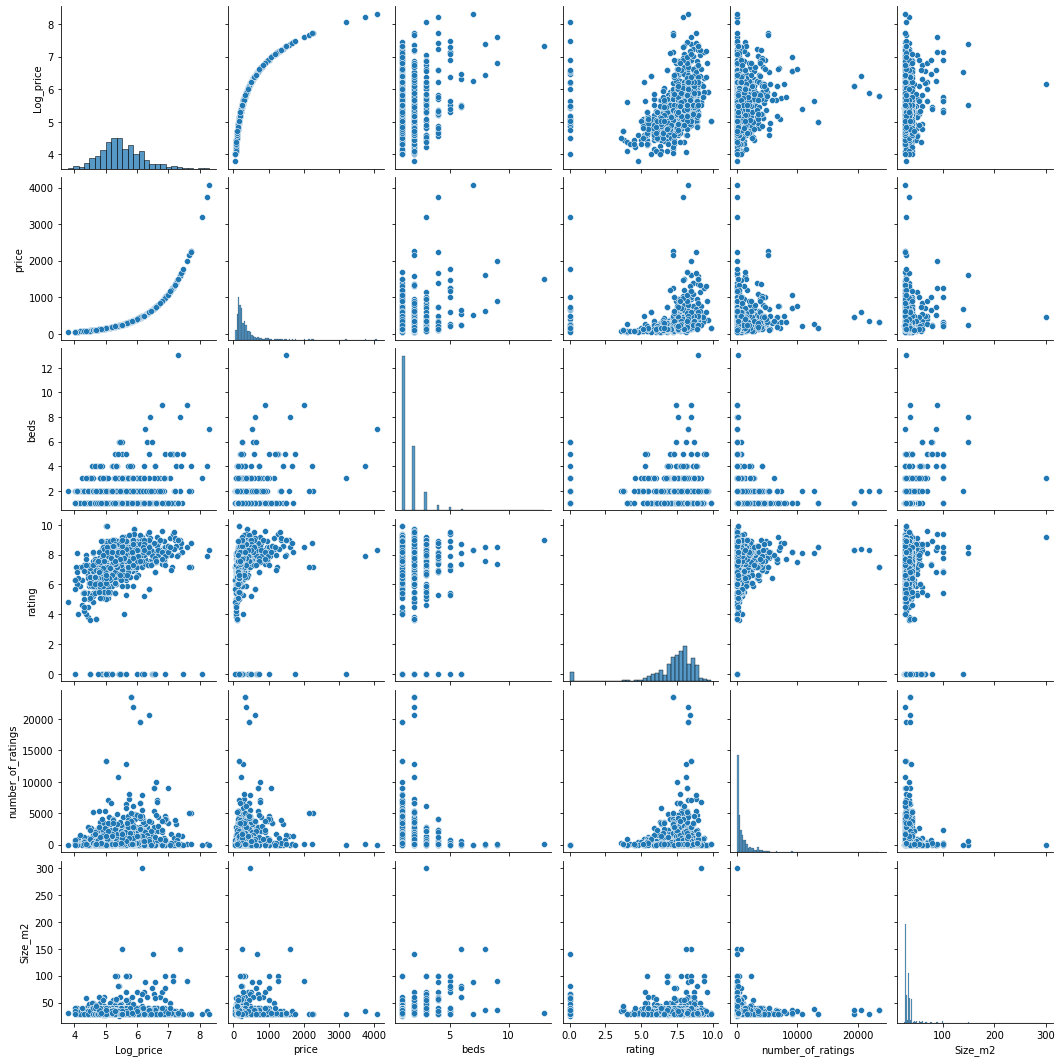

In [ ]:
sns.pairplot(x1)

In [ ]:
cor2 = x1.corr()
cor2

,Log_price,price,beds,rating,number_of_ratings,Size_m2
Log_price,1.000000,0.839812,0.210962,0.290134,0.177912,0.127142
price,0.839812,1.000000,0.327643,0.138060,0.096067,0.106590
beds,0.210962,0.327643,1.000000,-0.067222,-0.086818,0.394480
rating,0.290134,0.138060,-0.067222,1.000000,0.143199,-0.048904
number_of_ratings,0.177912,0.096067,-0.086818,0.143199,1.000000,-0.079989
Size_m2,0.127142,0.106590,0.394480,-0.048904,-0.079989,1.000000


In [ ]:
corrT = lin_hotels.corr()


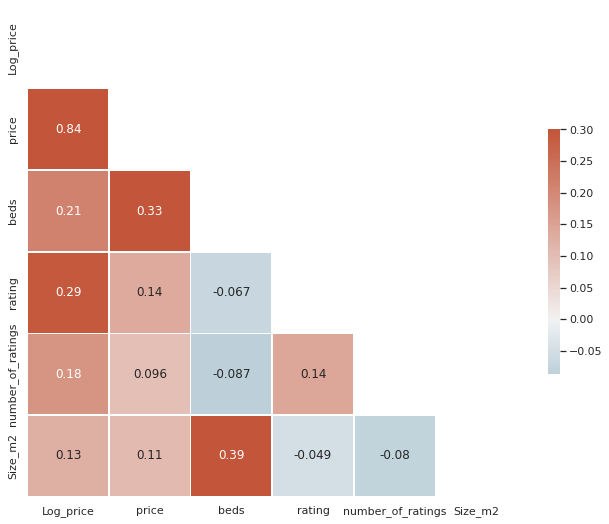

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
corrn = Hotels.corr()
corrn


,price,beds,rating,number_of_ratings,per_night,Log_number_of_ratings,Log_price,Size_m2,beds_log,beds_Boxcox,beds_boxcox^2,rating_Boxcox,number_of_ratings_Boxcox,Size_m2_log,Size_m2_Boxcox
price,1.000000,0.327643,0.138060,0.096067,NaN,0.034530,0.839812,0.106590,0.244846,0.152300,0.155036,0.247570,0.034319,0.092368,0.022608
beds,0.327643,1.000000,-0.067222,-0.086818,NaN,-0.247432,0.210962,0.394480,0.931813,0.795441,0.800033,-0.020712,-0.235210,0.432169,0.299912
rating,0.138060,-0.067222,1.000000,0.143199,NaN,0.116242,0.290134,-0.048904,-0.093441,-0.099358,-0.099521,0.906498,0.406877,-0.078519,-0.070277
number_of_ratings,0.096067,-0.086818,0.143199,1.000000,NaN,0.624482,0.177912,-0.079989,-0.072717,-0.048222,-0.049214,0.125975,0.693334,-0.089552,-0.065065
per_night,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Log_number_of_ratings,0.034530,-0.247432,0.116242,0.624482,NaN,1.000000,0.159810,-0.180774,-0.236448,-0.199789,-0.201130,0.073554,0.985840,-0.189730,-0.135076
Log_price,0.839812,0.210962,0.290134,0.177912,NaN,0.159810,1.000000,0.127142,0.132553,0.051838,0.054248,0.429389,0.164926,0.114335,0.045821
Size_m2,0.106590,0.394480,-0.048904,-0.079989,NaN,-0.180774,0.127142,1.000000,0.361621,0.281981,0.284983,0.004658,-0.184724,0.914971,0.621932
beds_log,0.244846,0.931813,-0.093441,-0.072717,NaN,-0.236448,0.132553,0.361621,1.000000,0.957082,0.959571,-0.053168,-0.227725,0.406619,0.302899
beds_Boxcox,0.152300,0.795441,-0.099358,-0.048222,NaN,-0.199789,0.051838,0.281981,0.957082,1.000000,0.999954,-0.069016,-0.193199,0.326036,0.261574


In [ ]:
corrT

,Log_price,beds_log,rating_Boxcox,number_of_ratings_Boxcox,Size_m2
Log_price,1.000000,0.132553,0.429389,0.164926,0.127142
beds_log,0.132553,1.000000,-0.053168,-0.227725,0.361621
rating_Boxcox,0.429389,-0.053168,1.000000,0.277301,0.004658
number_of_ratings_Boxcox,0.164926,-0.227725,0.277301,1.000000,-0.184724
Size_m2,0.127142,0.361621,0.004658,-0.184724,1.000000


we can see the correlation is stronger for transfromed variables:
for multiple linear regression model we 

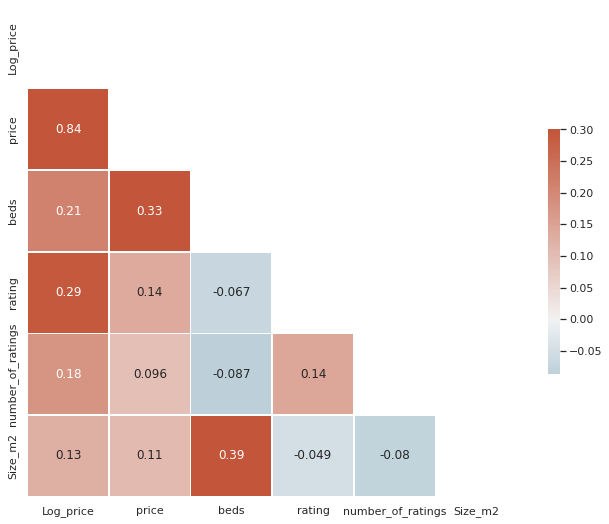

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Splitting data for testing, validating and traing
20% test 25% val 55% train

In [ ]:
from sklearn.model_selection import train_test_split

X_real, X_test, y_real, y_test = train_test_split(Hotels[['beds','rating', 'number_of_ratings']], Hotels['price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.25, random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
scaler = RobustScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)

NameError: ignored

# Models


*   Multiple Linear Regression 
*   Polynomial Regression (with multiple scailing)
*   Random Forest Regrssor
*   Decision Tree Regressor 
*   Pipelining a combonation of models




## Regularization on top


*   Ridge Regularization 
*   Lasso Regularization
*   Elastic net Regularization



## Parameter Tuning 


*   Train test split
*   Cross validation
*   Kfold 
*   Grid search for Hyper Parameters
*   Randomized search for Hyper Parameters 

then I check outlier influence and mulicollinearity using VIF



## Muliple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression


### Model 1 :with no transformations



In [ ]:
from sklearn.model_selection import train_test_split

X_real, X_test, y_real, y_test = train_test_split(Hotels[['beds','rating', 'number_of_ratings','Size_m2']], Hotels['price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.25, random_state=40)

NameError: ignored

In [ ]:
scaler = RobustScaler()

X_train_lm_scaled = scaler.fit_transform(X_train)

X_val_lm_scaled = scaler.transform(X_val)

In [ ]:
model = LinearRegression()
model.fit(X_train_lm_scaled, y_train)
model.score(X_train_lm_scaled, y_train)

In [ ]:
model.score(X_val_lm_scaled, y_val)

### Model 2 : the combonation of price, beds, rating box-cox, number of rating and size



In [ ]:
X_real, X_test, y_real, y_test = train_test_split(Hotels[['beds','rating_Boxcox', 'number_of_ratings','Size_m2']], Hotels['price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.25, random_state=40)

In [ ]:
scaler = RobustScaler()

X_train_lm_scaled = scaler.fit_transform(X_train)

X_val_lm_scaled = scaler.transform(X_val)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)


In [ ]:
model.score(X_val, y_val)

### Model 3: the combonation of log price, beds, rating box-cox, number of rating box-cox and size

In [ ]:
X_real, X_test, y_real, y_test = train_test_split(Hotels[['beds','rating_Boxcox', 'number_of_ratings_Boxcox','Size_m2']], Hotels['Log_price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.25, random_state=40)

In [ ]:
scaler = RobustScaler()

X_train_lm_scaled = scaler.fit_transform(X_train)

X_val_lm_scaled = scaler.transform(X_val)


In [ ]:
model = LinearRegression()
model.fit(X_train_lm_scaled, y_train)
model.score(X_train_lm_scaled, y_train)

In [ ]:
model.score(X_val_lm_scaled, y_val)

to conclude the multiple linear regression model we found that the model with the best fit was the 

## Polynomial Regression  : Abdultawwab

In [ ]:
x1= Hotels.select_dtypes(include=['float64', 'int','int64'])
#x1.head()

X1=  x1[['beds','number_of_ratings','rating']] # with size it will be reduced

y= x1['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=.15, random_state=3)


In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)
scaler = RobustScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)

### validation

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)



0.2933008891090493

In [ ]:
lr_poly.score(X_val_poly, y_val)

0.43687192556757415

## Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=.15, random_state=3)


### Model 1 : max depth = 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X1, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
m1 = RandomForestRegressor(max_depth=2, random_state=0)
m1.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Model 2 : number of estimators = 10


In [ ]:

# Fitting Random Forest Regression to the dataset
m2 = RandomForestRegressor(n_estimators = 10, random_state = 0)
m2.fit(X_train, y_train)
m2.score(X_train, y_train)




0.778379283650417

In [ ]:
m2.score(X_val, y_val)

-0.08044728301337489

In [ ]:
m2.score(X_test, y_test)

0.656412737442305

### Model 3 : number of estimators = 1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_splitx_train


m3 = RandomForestRegressor(n_estimators=1, random_state=10)
m3.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

### validation

In [ ]:
# Use the forest's predict method on the test data
predictions = m1.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions -  y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 155.93 degrees.


In [ ]:
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 30.54 %.


In [ ]:
# Use the forest's predict method on the test data
predictions = m2.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions -  y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 174.32 degrees.


In [ ]:
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 32.53 %.


In [ ]:
# Use the forest's predict method on the test data
predictions = m3.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions -  y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 165.47 degrees.


In [ ]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 29.29 %.


ValueError: ignored

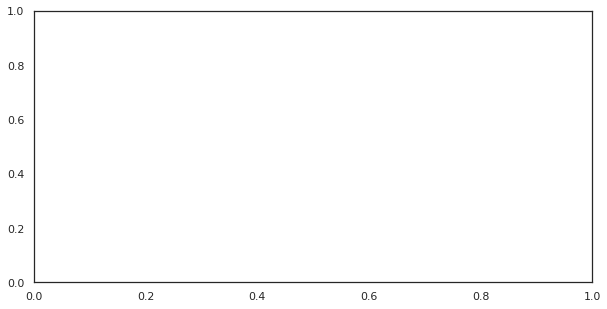

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_val, y_val, label="Truth")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")

## Decision Tree Regressor 





In [ ]:
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



### Model 1 : Decision Tree Regressor with no parameter tuning 

In [ ]:

m1 = DecisionTreeRegressor()

m1.fit(X_train,y_train)
print(m1.score(X_val,y_val))


### Model 2 : Decision Tree Regressor with Grid search





In [ ]:
m2 = DecisionTreeRegressor()

m2.fit(X_train,y_train)
#print(dtr.score(X_test,y_test))
#GridSearchCV 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search.fit(X_train, y_train)
print(g_search.best_params_)
print(g_search.score(X_train, y_train))



### Model 3 : Decision Tree Regressor with Randomized Search





In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

In [ ]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,
                                 cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)



In [ ]:
rfr_random.fit(X_train, y_train);
rfr_random.score(X_train, y_train)

### valdation

In [ ]:
rfr_random.score(X_val, y_val)

In [ ]:
g_search.score(X_val, y_val)

In [ ]:
m1.score(X_val, y_val)

## Gradient Booster 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=.15, random_state=3)

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.32429828507464853

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

validation

In [ ]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

best_regressor.score(X_val, y_val) 

0.2301785317134284

In [ ]:
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

179.5523543370454

In [ ]:
(y_test-y_pred).mean()# no bais less better

14.538719674050874

In [ ]:
best_regressor.score(X_test, y_test)

0.1239049351177751

## Ridge Regularazation

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)# parameter tunning

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_train_poly_scaled,y_train)
ridge.score(X_train_poly_scaled,y_train)

TypeError: ignored

In [ ]:
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

ridge.score(X_test_poly_scaled, y_test)

TypeError: ignored

In [ ]:
ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_train_poly_scaled,y_train)
ridge.score(X_train_poly_scaled,y_train)

TypeError: ignored

### validation

## Lasso Regularazation

In [ ]:
params = {"alpha": np.logspace(-4, -.1, 20)}
GS = GridSearchCV(Lasso(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train_poly_scaled, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29582572.544385053, tolerance: 8603.526946972177
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23666085.713789277, tolerance: 6954.084797708674
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26471225.381954618, tolerance: 7031.187491325696
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26774588.

In [ ]:
lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.0004380999789821427

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

0.15134223981145378

## Elastic Regularazation

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(GS.best_estimator_.alpha)
elastic.fit(X_train_poly_scaled,y_train)
elastic.score(X_train_poly_scaled,y_train)

0.07435800345929877

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


elastic.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

elastic.score(X_test_poly_scaled, y_test)

0.32283680773276424

## Pipelining with multipule regression types

# Testing

Random forest 

In [ ]:
predictions = m2.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


In [ ]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
